# Coding Buchla with Python

Learning about how to use Python for sound modulation. Taught by Tiago Rezende on 30.07.2023.

## First things first: install & import all necessary stuff

In [4]:
!pip install scipy --quiet
!pip install matplotlib --quiet
!brew install portaudio
!pip install pyaudio --quiet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio
from math import sin, pi, cos, fmod
import pyaudio 
import struct

In [2]:
p = pyaudio.PyAudio()

## Let's open an ongoing stream where we will hear the sound output

In [3]:
stream = p.open(channels = 1, rate = 44100, output = True, format = pyaudio.paFloat32)

In [4]:
def sound_out(seconds, sound_lambda):
    "utility function to render audio via a function or a lambda; that function will receive the current sample number"
    for t in range(0, int(44100.0 * seconds)):
        stream.write(struct.pack('f', sound_lambda(t/44100.0)))

In [5]:
def plot_sound(seconds, sound_lambda):
    "utility function to render audio to a plot, via a function or a lambda, similar to sound_out"
    plt.plot([sound_lambda(t/44100.0) for t in range(0, int(44100.0 * seconds))])

## Create the first sound

In [6]:
sound_out(1.0, lambda t: sin(440.0*pi*t))

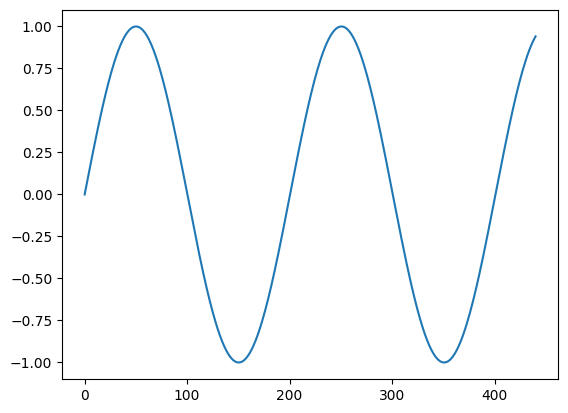

In [18]:
plot_sound(0.01, lambda t: sin(440.0*pi*t))

# Modulator 1: SIN wave


In [7]:
def wavefolder(wave, folds):
    return sin(wave * pi * 2.0 * folds)

### This is how it sounds

In [8]:
sound_out(1.0, lambda t: wavefolder(sin(440.0*pi*t), 5599999999999996))

### This is how it looks

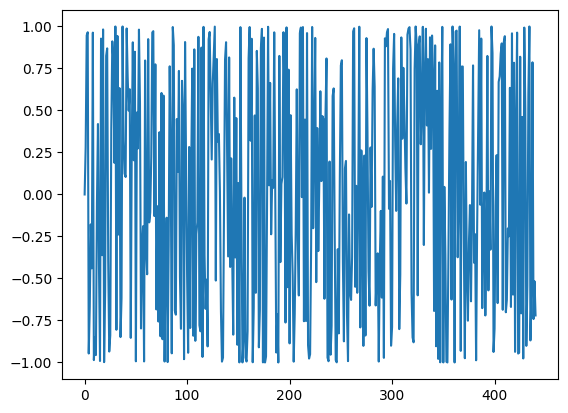

In [22]:
plot_sound(0.01, lambda t: wavefolder(sin(440.0*pi*t), 5599999999999996))

### Play with it!

In [23]:
sound_out(1.0, lambda t: wavefolder(sin(440.0*pi*t), 5))

# Modulator 2: COS wave

In [25]:
def wavefolder2(wave, folds):
    return cos(wave * pi * 2.0 * folds)

### Play with it!

In [29]:
sound_out(1.0, lambda t: wavefolder2(sin(440.0*pi*t), 99))

In [30]:
sound_out(1.0, lambda t: wavefolder(sin(440.0*pi*t), 99))

### Other modulators: digital Buchla-ish wavefolder

In [9]:
def buchlaish_wavefolder(wave, folds):
    return fmod(wave*folds, 1.0)

In [10]:
sound_out(1.0, lambda t: buchlaish_wavefolder(sin(440.0*pi * t), 4))

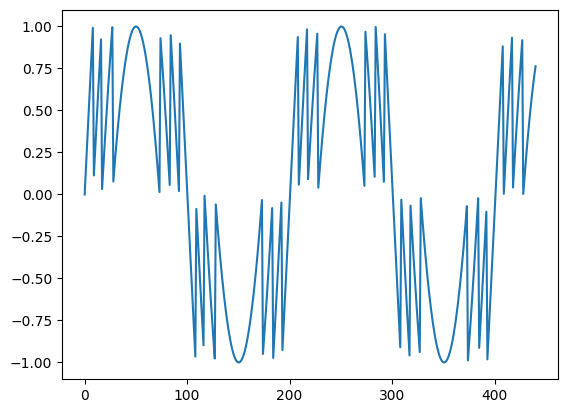

In [11]:
plot_sound(0.01, lambda t: buchlaish_wavefolder(sin(440.0*pi*t), 4))

In [16]:
from math import exp, log

In [17]:
def tube_overdrive(wave, drive):
    return 1.0/(1.0 + exp(-wave * drive))

In [18]:
sound_out(1.0, lambda t: tube_overdrive(sin(440.0*pi * t), 10))

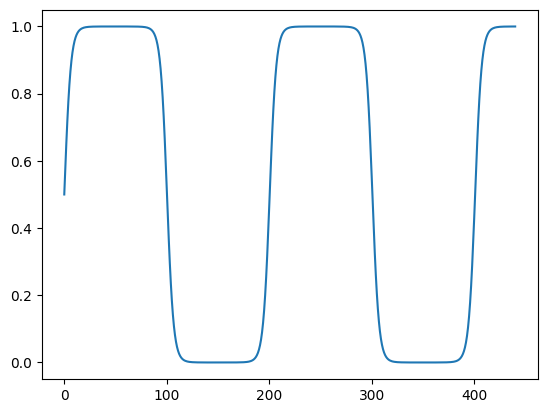

In [19]:
plot_sound(0.01, lambda t: tube_overdrive(sin(440.0*pi*t), 10))

# Frequency modulation 1 (SIN wave)

In [20]:
def fm(carrier_freq, x, modulator, modulation):
    return sin((carrier_freq * pi * 2.0 * x) + modulator * modulation)

## Play with it!

In [21]:
sound_out(1.0, lambda t: fm(440.0, t, cos(440.0*pi*t), 1))

In [22]:
sound_out(1.0, lambda t: fm(cos(40.0*pi*t), t, (cos(440.0*pi*t/99.0)), cos(440.0*pi*t)))

In [25]:
sound_out(1.0, lambda t: fm(cos(40.0*pi*t), t, (cos(440.0*pi*t/99.0)), cos(440.0*pi*t)))

In [26]:
sound_out(1.0, lambda t: fm(228.0, t,
                            fm(18.0, t,
                               fm(5.0, t,
                                  fm(1.0, t,
                                     fm(8.0, t, 0,0), 1), 7), 5), 5))

In [29]:
sound_out(1.0, lambda x: fm(2.0, x,
                             fm(228.0, x,
                                fm(18.0, x,
                                   fm(5.0, x,
                                      fm(1.0, x,
                                         fm(8.0, x, 0,0), 1), 7), 5), 5), 7))

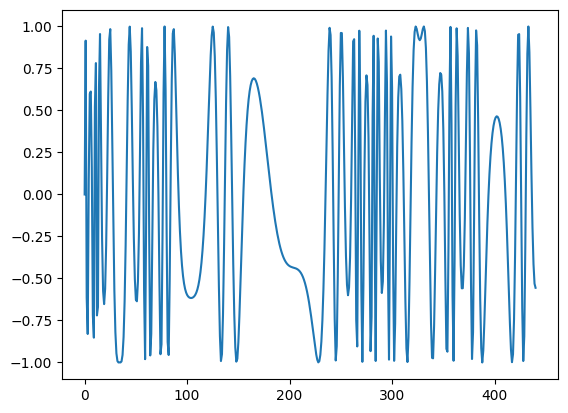

In [30]:
plot_sound(0.01, lambda x: fm(2.0, x, fm(228.0, x, fm(18.0, x,
                                   fm(5.0, x,
                                      fm(1.0, x,
                                         fm(8.0, x, 0,0), 1), 7), 5), 5), 7))

In [31]:
sound_out(1.0, lambda x: fm(2.0, x,
                             fm(8.0, x,
                                fm(8.0, x,
                                   fm(5.0, x,
                                      fm(1.0, x,
                                         fm(8.0, x, 0,0), 1), 79), 1), 1), 1))

In [32]:
sound_out(1.0, lambda x: fm(1.0, x,
                            fm(2.0, x,
                               fm(3.0, x,
                                  fm(4.0, x,
                                     fm(5.0, x,
                                        fm(6.0, x, 7, 6), 5), 4), 4), 3), 2))

# Create an envelope

In [33]:
def ar_env(a, r, t):
    if a <= 0:
        # to avoid the deivide by 0 in attack
        return max(0.0, (1.0 - t) / r)
    elif t <= a:
        # the attack phase
        return max(0.0, t / a)
    elif r <= 0:
        # to avoid deivide by 0 in release phase
        return 0.0
    return max(0.0, (1.0 - (t - a) / r))

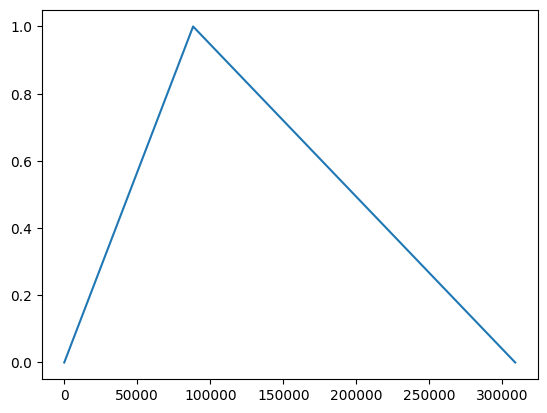

In [34]:
plot_sound(7.0, lambda t: ar_env(2, 5, t))

## Play with it!

In [35]:
sound_out(12.0, lambda x: fm(1.0, x,
                             fm(2.0, x,
                                fm(3.0, x,
                                   fm(4.0, x,
                                      fm(5.0, x,
                                         fm(6.0, x, 7, 6), 5), ar_env(1, 33, x)*88), ar_env(1, 33, x)*4), 
                                ar_env(1, 9, x)*7), 
                                ar_env(1, 9, x)*3))

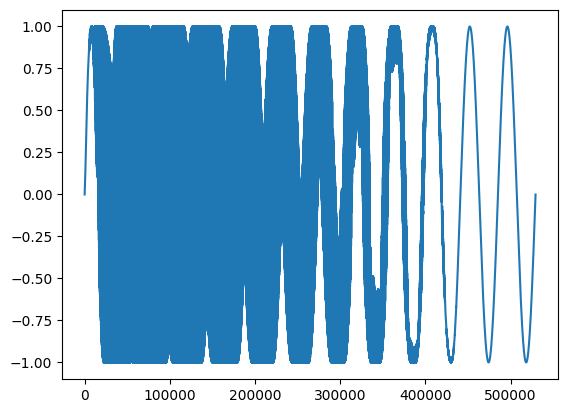

In [36]:
plot_sound(12, lambda x: fm(1.0, x,
                             fm(2.0, x,
                                fm(3.0, x,
                                   fm(4.0, x,
                                      fm(5.0, x,
                                         fm(6.0, x, 7, 6), 5), ar_env(1, 33, x)*88), ar_env(1, 33, x)*4), 
                                ar_env(1, 9, x)*7), 
                                ar_env(1, 9, x)*3))

# Oscillator 3: SAW wave

In [37]:
def saw(freq, t):
    return fmod(freq * t, 1.0)

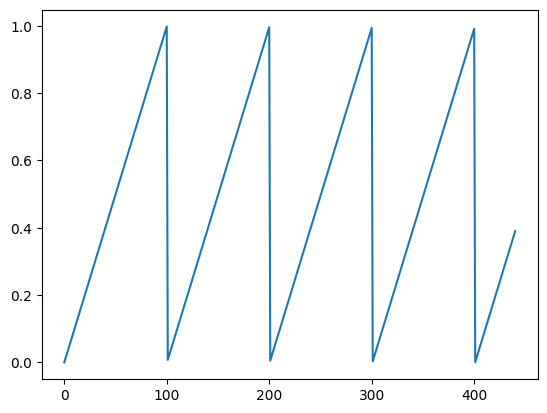

In [38]:
plot_sound(0.01, lambda t: saw(440.0, t))

## Play with it!

In [40]:
sound_out(1.0, lambda t: saw(160, t))

In [56]:
sound_out(1.0, lambda t: buchlaish_wavefolder(saw(160, t), 1 + ar_env(0.2, 0.8, t)*5.0))

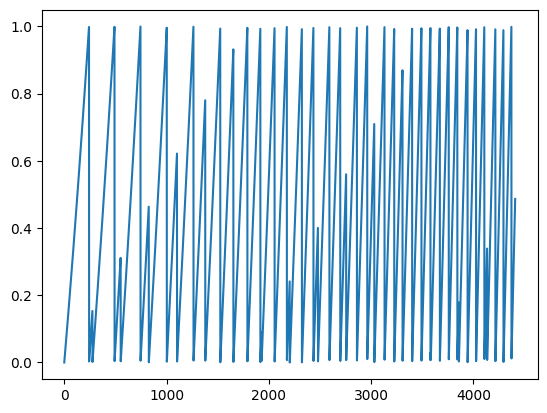

In [55]:
plot_sound(0.1, lambda t: buchlaish_wavefolder(saw(160, t), 1 + ar_env(0.2, 0.8, t)*5.0))

### Add other stuff: low frequency FMs are modulating the SAW >

In [96]:
sound_out(5.0, lambda t: fm(0.5, t, 8, 8) * fm(0.1, t, 1, 1) * saw(260, t))

### Add other stuff: SAW modulates the FMs >

In [97]:
sound_out(5.0, lambda t: saw(0.5, t) * fm(108, t, 9, 8) * fm(507, t, 18, 18))

In [74]:
for t in range(0, 44100*5):
    stream.write(struct.pack('f', saw(0.3, t) * fm(800, t, 66, 44) * fm(607, t, 50, 33)))

### Multiply the frequency of the SAW by the envelope

In [104]:
sound_out(9.0, lambda t: (saw(11 * ar_env(4, 6, t), t)    # wrapped it up in parentheses to stop the lambda from complaining
                          * fm(108 * ar_env(2, 5, t), t, 9, 8)
                          * fm(507 * ar_env(2, 5, t), t, 18, 18)))

In [105]:
sound_out(13.0, lambda t: (saw(11 * ar_env(4, 6, t), t) 
                           * fm(108 * ar_env(9, 2, t), t, 9, 8) 
                           * fm(507 * ar_env(9, 9, t), t, 18, 18)))

In [106]:
sound_out(13.0, lambda t: (saw(11 * ar_env(3, 8, t), t) 
                           * fm(108 * ar_env(4, 8, t), t, 9, 8) 
                           * fm(507 * ar_env(9, 9, t), t, 18, 18)))

# Modulator 4: SQUARE wave

In [107]:
def square(freq, t):
    return 1.0 if fmod(freq*t, 1.0) > 0.5 else 0.0

## Play with it!

In [108]:
sound_out(9.0, lambda t: (square(51 * ar_env(3, 18, t), t) 
                          * fm(5554 * ar_env(4, 18, t), t, 1, 8) 
                          * fm(644 * ar_env(9, 19, t), t, 4, 8)))

In [112]:
sound_out(9.0, lambda t: (saw(51 * ar_env(3, 18, t), t) 
                          * fm(5554 * ar_env(4, 18, t), t, 1, 8) 
                          * fm(644 * ar_env(9, 19, t), t, 4, 8)))

In [114]:
sound_out(9.0, lambda t: (square(395 * ar_env(344, 39, t), t) 
                          * fm(8904 * ar_env(49, 18, t), t, 13, 83) 
                          * fm(5064 * ar_env(49, 83, t), t, 34, 38)))

In [117]:
sound_out(9.0, lambda t: (square(395 * ar_env(4, 9, t), t) 
                          * fm(8904 * ar_env(1, 1, t), t, 13, 83) 
                          * fm(5064 * ar_env(1, 3, t), t, 34, 38) * saw(591 * ar_env(3, 18, t), t)))

# Generate NOISE <3 <3 <3

Next step! LFSR = Linear Feedback Shift Register 
https://en.wikipedia.org/wiki/Linear-feedback_shift_register
> will allow us to generate some bautiful noise!


In [110]:
class LFSR:
    def __init__(self, taps = [1, 3, 12]):
        self.state = 1938
        self.taps = taps
        self.feedback = 16
    def tick(self):
        tapped = 1
        for t in self.taps:
            tapped = tapped ^(self.state >> t)
        self.state = (self.state >> 1) + ((tapped & 1) << self.feedback)
        return self.state
    def sample(self):
        return self.tick() & 1
            

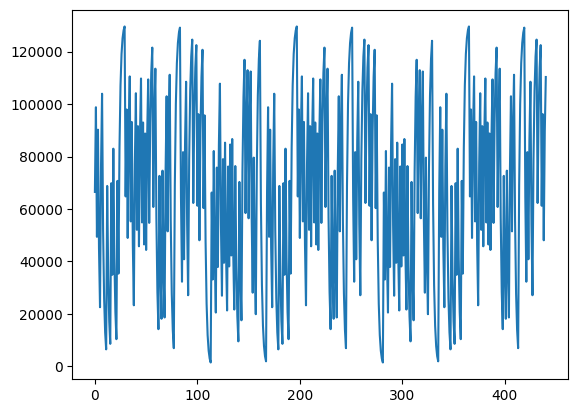

In [111]:
lfsr = LFSR(taps=[1, 3, 7])
plot_sound(0.01, lambda x: lfsr.tick())

#(lambda x: (x, (x & 1) * 120000))

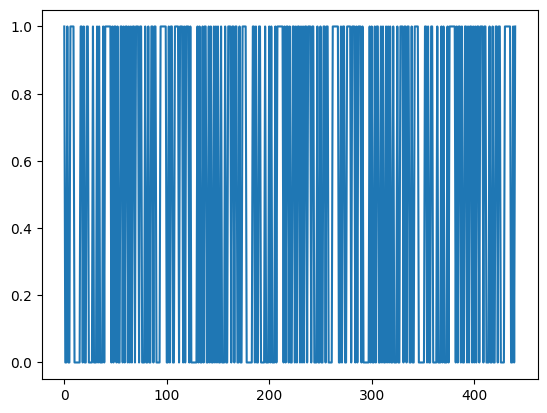

In [118]:
lfsr = LFSR(taps=[1, 3, 7])
plot_sound(0.01, lambda x: lfsr.sample())

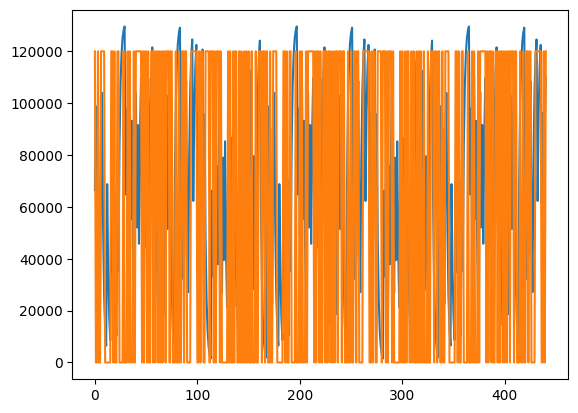

In [119]:
lfsr = LFSR(taps=[1, 3, 7])
plot_sound(0.01, lambda y: (lambda x: (x, (x & 1) * 120000))(lfsr.tick()))

#(lambda x: (x, (x & 1) * 120000))

## Play with it!!!

In [120]:
lfsr = LFSR(taps=[1, 2, 4])
sound_out(1.0, lambda t:lfsr.sample())

In [124]:
lfsr = LFSR(taps=[15, 14, 11, 5])

# as we want to modify stuff as we sample, doing this with a lambda doesn't work that well in python
def do_sample(t):
    lfsr.taps[3] = int(ar_env(0.5, 5.0, t) * 8 + 3)
    return lfsr.sample()

sound_out(1.0, do_sample)

In [126]:
lfsr = LFSR(taps=[11, 14, 12, 13])

def do_sample(t):
    lfsr.taps[3] = int(ar_env(0.5, 5.0, t) * 8 + 3)
    return lfsr.sample()

sound_out(10.0, do_sample)

# Another oscillator PULSE

In [127]:
def pulse(freq, t, width):
    return 1.0 if fmod(freq*t, 1.0) > (1.0 - width) else 0.0

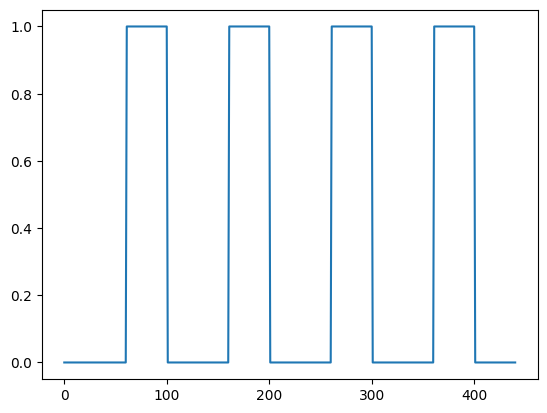

In [129]:
plot_sound(0.01, lambda t: pulse(440, t, 0.4))

## Play with it

In [130]:
sound_out(1.0, lambda t: pulse(160, t, 0.3))

In [131]:
def do_sample(t):
    lfsr.taps[3] = int(ar_env(0.5, 3.0, t) * 2 + 1)
    return lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() - pulse(3*ar_env(2, 3, t), t, 0.3* ar_env(3, 6, t))

sound_out(5.0, do_sample)

In [132]:
def do_sample(t):
    lfsr.taps[3] = int(ar_env(0.2, 8.0, t) * 8 + 7)
    return lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() - pulse(3*ar_env(2, 3, t), t, 0.3* ar_env(3, 6, t))

sound_out(10.0, do_sample)

In [133]:
def do_sample(t):
    lfsr.taps[3] = int(ar_env(0.2, 8.0, t) * 8 + 7)
    return lfsr.sample() * lfsr.sample() * lfsr.sample() - pulse(3*ar_env(222, 32, t), t, 0.3 * ar_env(12, 64, t))

sound_out(10.0, do_sample)

In [135]:
sound_out(15.0, lambda t: pulse(16450, t, 0.8 * lfsr.sample()) * pulse(33990 * ar_env(0.3, 6, t), t, 0.5))

# Tiago's extra oscillators

## Hypersaw

In [117]:
def hypersaw(f, t, detune, waves=10):
    waves = max(waves, 1)
    return sum(fmod(f * (t + t * w * detune), 1.0) / waves for w in range(0, waves))

In [118]:
sound_out(1.0, lambda t: hypersaw(440.0, t, 0.003))

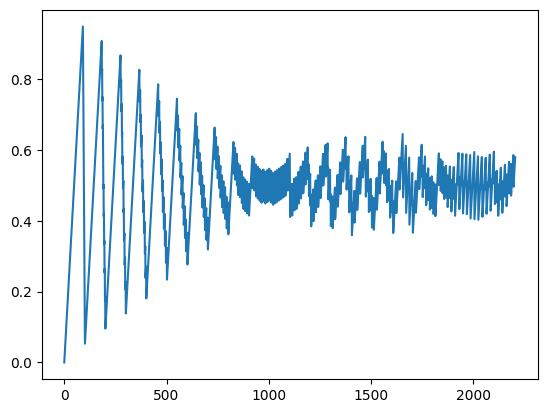

In [119]:
plot_sound(0.05, lambda t: hypersaw(440.0, t, 0.01))

## Bytebeat

Bytebeat is a class of oscillators that work with integer values, and appeared at first on unix machines.
Lots of these can be heard at [https://greggman.com/downloads/examples/html5bytebeat/html5bytebeat.html]

In [219]:
def bytebeat_ryg(t):
    t = int(t * 8000)          # put the current time in the original bytebeat rate of 8192hz
    core = ((t >> 10) & 42) * t  # this is the core bytebeat calculation
    return (core & 255) / 255.0  # clip values and scale back to float

In [220]:
sound_out(10.0, bytebeat_ryg)

In [62]:
def bytebeat_blueberry(t):
    t = int(t * 11025)
    core = t * (((t >> 9)^((t >> 9)-1)^1)%13)
    return (core & 255) / 255.0

In [63]:
sound_out(10.0, bytebeat_blueberry)

In [64]:
def bytebeat_colon_arp(t):
    t = int(t * 44100)
    core = ((t >> (1 + (t >> 18) % 2))%256*(t % (4 + ((t >> 15) % 8))))
    return (core & 255) / 255.0

In [65]:
sound_out(10.0, bytebeat_colon_arp)

In [66]:
def bytebeat_ral(t):
    # https://greggman.com/downloads/examples/html5bytebeat/html5bytebeat.html#t=0&e=0&s=22050&bb=5d0000010049000000000000000017e07c4aa280f64e6cb3a0909cba2cb729e4df96fd77da140c64f32d365584315a86b9076ccd3418130d6062330cbd5a4c2a96f6cc949413e4e1679d3d22965795dfff04b68000
    t = int(t * 22050)
    core = t >> 6 ^ t >> 9 ^ t >> 12 | (t << (t >> 6) % 4 ^ - t & -t >> 13) % 128 ^ - t >> 1
    return (core & 255) / 255.0

In [215]:
sound_out(10.0, bytebeat_ral)

In [91]:
def bytebeat_o(t):
    t = int((t+4.0) * 8192) # advance a little in time, as the beginning is kinda muted
    core = (int(30*sin(t>>5))*(t>>15))
    return (core & 255) / 255.0

In [93]:
sound_out(10.0, bytebeat_o)

In [101]:
def bytebeat_crkzstp(t): # https://greggman.com/downloads/examples/html5bytebeat/html5bytebeat.html#t=0&e=0&s=32000&v=smutz&bb=5d000001007e000000000000000017e07c86522ce94d010693807f55fe93f379a861621f86fa4d04d60678d1bf3f1a8629b8f0b2992244e813930b5643a3ec9191477fc2aaf997f4af69c0bb02bd5ca0ecc22e4aea51c5ddd530a666d0db0da50e2a17c192b825ca0ba66230d4715d2d72403621437125a8eaeb13ba6ba1bf2642c9ff3180632a3fff954fc000
    t = int(t * 32000)
    f = lambda x: t&(165&t%255) and t/256*(t&t>>x)
    core = f(12)-f(14)+128
    return (int(core) & 255) / 255.0

In [132]:
sound_out(20.0, bytebeat_crkzstp)

In [179]:
def bytebeat_explosion(t, taps=[4, 3, 2]):
    # an entire type of bytebeats, based on multiplying and OR'ing t to three separate amounts
    t = int(t * 8000)
    core = (t>>int(taps[0]))*(t>>int(taps[1]))|t>>int(taps[2])
    return (int(core) & 255) / 255.0

In [181]:
sound_out(10.0, bytebeat_explosion)

In [214]:
sound_out(4.0, lambda t: bytebeat_explosion(t, taps=[4, 3, 3]))

In [188]:
sound_out(4.0, lambda t: bytebeat_explosion(t, taps=[4, 3, 4]))

In [189]:
sound_out(4.0, lambda t: bytebeat_explosion(t, taps=[5, 5, 2]))

In [194]:
def bytebeat_brain_burner(t):
    # https://greggman.com/downloads/examples/html5bytebeat/html5bytebeat.html#t=0&e=0&s=8000&bb=5d0000010048000000000000000017e07c4487352fe341a56c8fc174afd2e82bee3237971a7a0d39f713f3808a89911dbbcb58be97c97bd2671ca8a3cc64e337cc3eaa62b98f9e0c748f243eb093f997f574e0578fd0a148311ffeb3d000
    t = int(t * 8000)
    t_shifted_7 = t >> 7 # had to split this off, otherwise python complains
    core = 0 if t_shifted_7 == 0 else (129*t%t_shifted_7)
    return (int(core) & 255) / 255.0

In [195]:
sound_out(10.0, bytebeat_brain_burner)

In [200]:
def bytebeat_protoss_engine(t):
    # https://greggman.com/downloads/examples/html5bytebeat/html5bytebeat.html#t=0&e=0&s=8000&bb=5d0000010070000000000000000017e07c44952e33470034e51802a33ceff14dcff5d7778ff669e3b8b6397fb43a38052b7cfe169a8887e25c42709ced2dbe26e9d0c714f382fe6e83347597beb654109cdcbf5c804d991fbbe2bb010be521762176ae62390be38504b861c4ddc9d792a7e19c9769cff207ac6bff37328000
    t = int(t * 8000)
    core = 2*(-t%128|t%130)
    return (int(core) & 255) / 255.0

In [201]:
sound_out(10.0, bytebeat_protoss_engine)

In [212]:
def bytebeat_dubstep_thingy(t):
    # https://greggman.com/downloads/examples/html5bytebeat/html5bytebeat.html#t=0&e=0&s=44100&bb=5d000001009f000000000000000017e07cc8753016c248261e7bb25b5550cc00ad8cc680a2c71863f38dc4083896ea8b28818a55342618d8ee67125b3b801a164c2c47dd7596b318bef5b754910f3e58c43763f5beafb9fb2e12f97e992884b061bf4ec3183f9e9d6894bea6cbb61cced1d5b53b5e777de4571bbf5234f4ba4eb01938dd319600e884f00e13aa80a6e6c23c6df45a3b83fa51ffe8177000
    t = int(t * 44100)
    a = int(t * (t & t >> 12) / 256)
    core = 128 + sin(a / 20.5) * ((a >> 5) % 32) * 4
    return (int(core) & 255) / 255.0

In [213]:
sound_out(15.0, bytebeat_dubstep_thingy)

In [221]:
def bytebeat_sierpinski_melody(t):
    #
    t = int(t * 8000)
    core = t*5&(t>>7)|t*3&(t*4>>10)
    return (int(core) & 255) / 255.0

In [223]:
sound_out(16.0, bytebeat_sierpinski_melody)

### Let's modulate them!

In [116]:
sound_out(10.0, lambda t: bytebeat_ral(t + fm(5.0 * ar_env(1, 9, t), t, 0, 0)))

In [115]:
sound_out(10.0, lambda t: fm(220.0 + bytebeat_ryg(t)*10.0, t, 0, 0))

In [114]:
sound_out(10.0, lambda t: fm(110.0, t, fm(440.0, t, bytebeat_blueberry(t), 10.0 * fm(2, t, 0, 0)), 2.0))

In [230]:
sound_out(20.0, lambda t: (bytebeat_crkzstp(t + fm(.3, t, 0, 0) * 0.1) -
                           bytebeat_crkzstp(t) +
                           bytebeat_explosion1(t+bytebeat_explosion(t*5.0*fm(0.07, t, 0, 0))*0.01)))

In [229]:
sound_out(20.0, lambda t: bytebeat_sierpinski_melody(t + fm(.4, t, bytebeat_protoss_engine(t), 0.3) * 0.1))

## Simple filters

In [121]:
class SimpleLPF: # a simple low-pass filter
    def __init__(self):
        self.accum = 0
    def filter(self, value, amount):
        # a low pass filter essentially smooths out higher frequencies.
        # this filter is not really very controllable, as the frequency is dependant on the amount
        # and the frequency response is very low.
        a = self.accum * amount
        b = (value - self.accum)*(1.0 - amount)
        self.accum = a + b
        return self.accum

In [139]:
lpf = SimpleLPF()
sound_out(10.0, lambda t: lpf.filter(bytebeat_crkzstp(t + fm(.3, t, 0, 0) * 0.1) - bytebeat_crkzstp(t), 1.0 - ar_env(2, 8, t)))

In [159]:
from math import floor

def decimate(value, bits):
    bits = max(1, bits)
    return floor(value * bits) / bits

In [173]:
sound_out(1.0, lambda t: decimate(sin(220.0 * pi * t), 3))

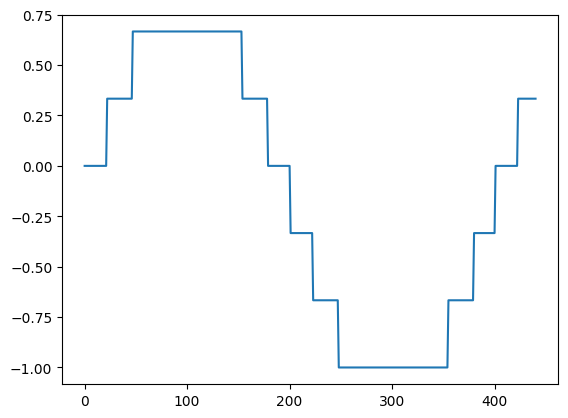

In [174]:
plot_sound(0.01, lambda t: decimate(sin(220.0 * pi * t), 3))

In [233]:
sound_out(5.0, lambda t: decimate(fm(220.0, t, 0, 0), 10.0 * ar_env(1, 4, t)))